In [1]:
# Import library

import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Read dataframe from csv file
df = pd.read_csv('/content/Dataset.csv')
df

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137638,137638,6/14/2013,Station 3,3.1,17.5,0.0,2.4,9.7,ESE,35.0,...,66.0,37.0,1021.4,1018.4,1.0,NaN,9.9,16.4,No,No
137639,137639,6/15/2013,Station 3,2.0,18.0,0.0,4.2,6.8,ESE,35.0,...,62.0,33.0,1022.1,1018.3,2.0,6.0,9.6,17.4,No,No
137640,137640,6/16/2013,Station 3,1.1,18.7,0.0,3.4,9.5,E,30.0,...,57.0,34.0,1020.6,1016.2,2.0,5.0,9.8,17.0,No,No
137641,137641,6/17/2013,Station 3,7.1,19.9,0.0,3.2,7.6,N,41.0,...,48.0,33.0,1017.8,1014.6,5.0,5.0,12.8,18.5,No,No


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137638,6/14/2013,Station 3,3.1,17.5,0.0,2.4,9.7,ESE,35.0,SE,...,66.0,37.0,1021.4,1018.4,1.0,NaN,9.9,16.4,No,No
137639,6/15/2013,Station 3,2.0,18.0,0.0,4.2,6.8,ESE,35.0,E,...,62.0,33.0,1022.1,1018.3,2.0,6.0,9.6,17.4,No,No
137640,6/16/2013,Station 3,1.1,18.7,0.0,3.4,9.5,E,30.0,NaN,...,57.0,34.0,1020.6,1016.2,2.0,5.0,9.8,17.0,No,No
137641,6/17/2013,Station 3,7.1,19.9,0.0,3.2,7.6,N,41.0,ENE,...,48.0,33.0,1017.8,1014.6,5.0,5.0,12.8,18.5,No,No


In [4]:
# Check null values for each feature
df.isnull().sum()

Date                                0
Weather Station                     0
Minimum Temperature              1399
Maximum Temperature              1211
Rainfall                         3179
Evaporation                     60869
Sunshine                        66203
Gust Trajectory                 10188
Air Velocity                    10129
Gust Trajectory at  9 AM        10310
Gust Trajectory at  3 PM         4173
Air Velocity at  9 AM            1726
Air Velocity at  3 PM            3024
Moisture Level at 9 AM           2554
Moisture Level at 3 PM           3663
Atmospheric Pressure at 9 AM    15052
Atmospheric Pressure at 3 PM    15016
Cloudiness at 9 AM              54302
Cloudiness at 3 PM              57183
Recorded Temperature at 9 AM     1711
Recorded Temperature at 3 PM     2880
Rain that day                    3180
Rain the day after               3182
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day

df = df.drop(['Date'], axis=1)

In [6]:
df.describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Month
count,136244.000000,136432.000000,134464.000000,76774.000000,71440.000000,127514.000000,135917.000000,134619.000000,135089.000000,133980.000000,122591.000000,122627.000000,83341.000000,80460.000000,135932.000000,134763.000000,137643.000000
mean,11.805142,22.719261,2.321397,5.326290,7.541869,40.023001,13.995372,18.674407,69.588915,52.214480,1017.875626,1015.570773,4.500258,4.546160,16.545541,21.226969,6.395937
std,6.135539,6.875878,8.209311,4.193778,3.803718,13.789012,8.990329,8.922074,18.562281,20.476763,7.141550,7.017837,2.884708,2.717311,6.223811,6.706902,3.428294
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000
25%,7.500000,17.700000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.200000,1010.900000,1.000000,2.000000,12.100000,16.400000,3.000000
50%,11.700000,22.200000,0.000000,4.400000,8.300000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.900000,1015.600000,5.000000,5.000000,16.400000,20.700000,6.000000
75%,16.300000,27.400000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.600000,1020.300000,7.000000,7.000000,20.900000,25.700000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,12.000000


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['Rain the day after'])

X = df.drop('Rain the day after', axis=1)
y = df['Rain the day after']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
train = pd.concat([X_train, y_train], axis=1)

In [9]:
train.isnull().sum()

Weather Station                     0
Minimum Temperature               472
Maximum Temperature               250
Rainfall                         1112
Evaporation                     47219
Sunshine                        51435
Gust Trajectory                  7376
Air Velocity                     7334
Gust Trajectory at  9 AM         7745
Gust Trajectory at  3 PM         3004
Air Velocity at  9 AM            1041
Air Velocity at  3 PM            2092
Moisture Level at 9 AM           1314
Moisture Level at 3 PM           2229
Atmospheric Pressure at 9 AM    11314
Atmospheric Pressure at 3 PM    11279
Cloudiness at 9 AM              41675
Cloudiness at 3 PM              43977
Recorded Temperature at 9 AM      686
Recorded Temperature at 3 PM     1633
Rain that day                    1112
Month                               0
Rain the day after                  0
dtype: int64

In [10]:
# Drop rows where 'Rain that day' is null
train = train.dropna(subset=['Rain that day'])
train.isnull().sum()

Weather Station                     0
Minimum Temperature               353
Maximum Temperature               238
Rainfall                            0
Evaporation                     46328
Sunshine                        50649
Gust Trajectory                  7247
Air Velocity                     7206
Gust Trajectory at  9 AM         7469
Gust Trajectory at  3 PM         2921
Air Velocity at  9 AM             814
Air Velocity at  3 PM            2017
Moisture Level at 9 AM           1127
Moisture Level at 3 PM           2156
Atmospheric Pressure at 9 AM    11102
Atmospheric Pressure at 3 PM    11115
Cloudiness at 9 AM              40870
Cloudiness at 3 PM              43190
Recorded Temperature at 9 AM      506
Recorded Temperature at 3 PM     1565
Rain that day                       0
Month                               0
Rain the day after                  0
dtype: int64

In [11]:
train.shape

(106456, 23)

In [12]:
# Drop rows with 10 or more null values
# Since you have 25 features, setting thresh to 16 means at least 16 non-NA values must be present
train = train.dropna(thresh=16)

train.shape

(104041, 23)

In [13]:
train.isnull().sum()

Weather Station                     0
Minimum Temperature                95
Maximum Temperature                68
Rainfall                            0
Evaporation                     44290
Sunshine                        48275
Gust Trajectory                  5209
Air Velocity                     5191
Gust Trajectory at  9 AM         6204
Gust Trajectory at  3 PM          963
Air Velocity at  9 AM             131
Air Velocity at  3 PM             307
Moisture Level at 9 AM            635
Moisture Level at 3 PM            747
Atmospheric Pressure at 9 AM     9225
Atmospheric Pressure at 3 PM     9191
Cloudiness at 9 AM              39722
Cloudiness at 3 PM              41095
Recorded Temperature at 9 AM       96
Recorded Temperature at 3 PM      234
Rain that day                       0
Month                               0
Rain the day after                  0
dtype: int64

In [14]:
# Apply forward fill to specific columns
train['Maximum Temperature'].fillna(method='ffill', inplace=True)
train['Minimum Temperature'].fillna(method='ffill', inplace=True)
train['Recorded Temperature at 9 AM'].fillna(method='ffill', inplace=True)
train['Recorded Temperature at 3 PM'].fillna(method='ffill', inplace=True)

In [15]:
train.isnull().sum()

Weather Station                     0
Minimum Temperature                 0
Maximum Temperature                 0
Rainfall                            0
Evaporation                     44290
Sunshine                        48275
Gust Trajectory                  5209
Air Velocity                     5191
Gust Trajectory at  9 AM         6204
Gust Trajectory at  3 PM          963
Air Velocity at  9 AM             131
Air Velocity at  3 PM             307
Moisture Level at 9 AM            635
Moisture Level at 3 PM            747
Atmospheric Pressure at 9 AM     9225
Atmospheric Pressure at 3 PM     9191
Cloudiness at 9 AM              39722
Cloudiness at 3 PM              41095
Recorded Temperature at 9 AM        0
Recorded Temperature at 3 PM        0
Rain that day                       0
Month                               0
Rain the day after                  0
dtype: int64

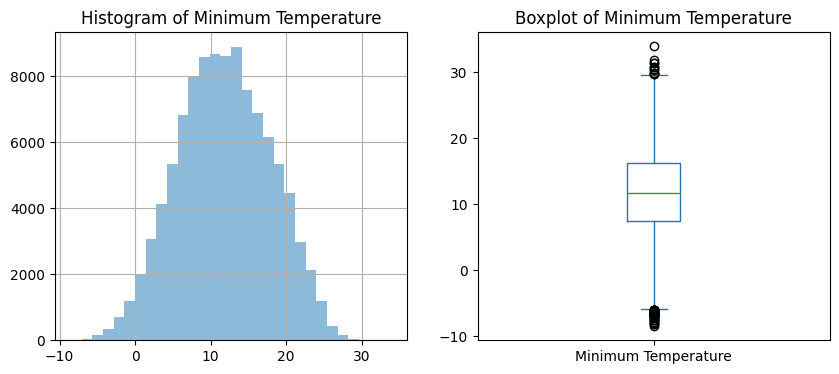

Statistics for Minimum Temperature:
Mean: 11.814457761843888
Median: 11.7
Mode: 10.2




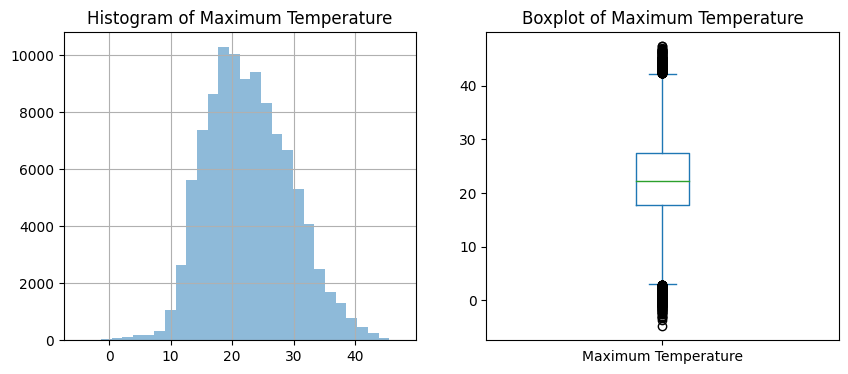

Statistics for Maximum Temperature:
Mean: 22.775995040416756
Median: 22.2
Mode: 20.0




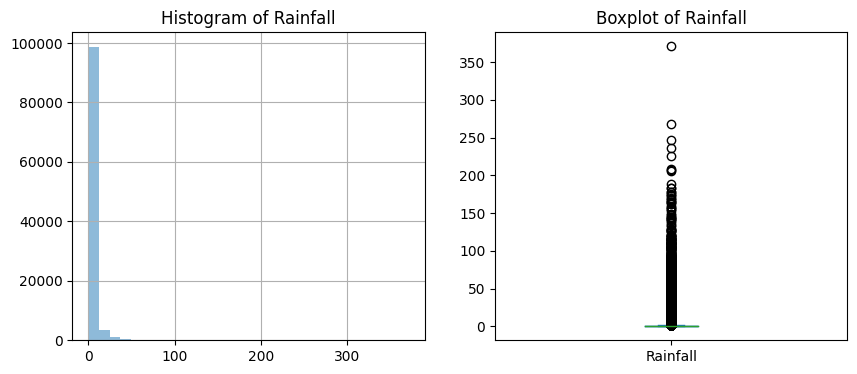

Statistics for Rainfall:
Mean: 2.2836891225574534
Median: 0.0
Mode: 0.0




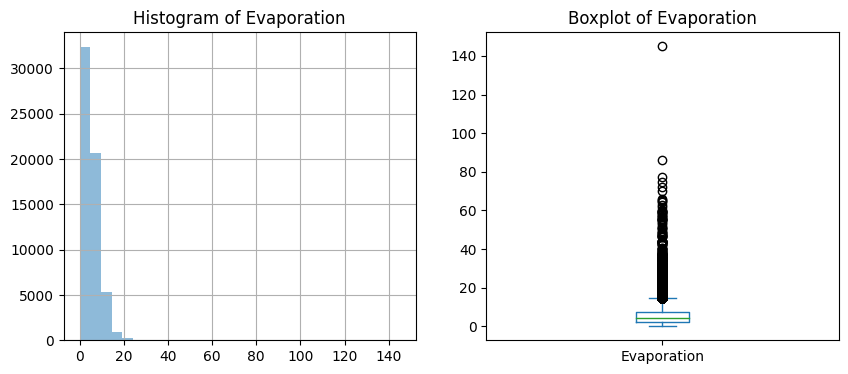

Statistics for Evaporation:
Mean: 5.3251644323944385
Median: 4.4
Mode: 4.0




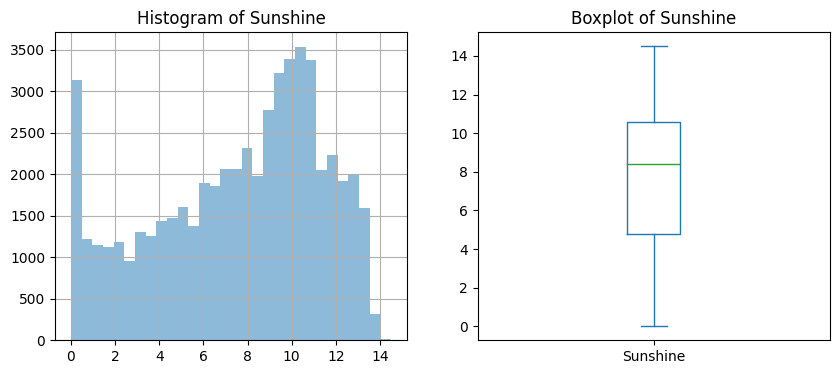

Statistics for Sunshine:
Mean: 7.555415486138508
Median: 8.4
Mode: 0.0




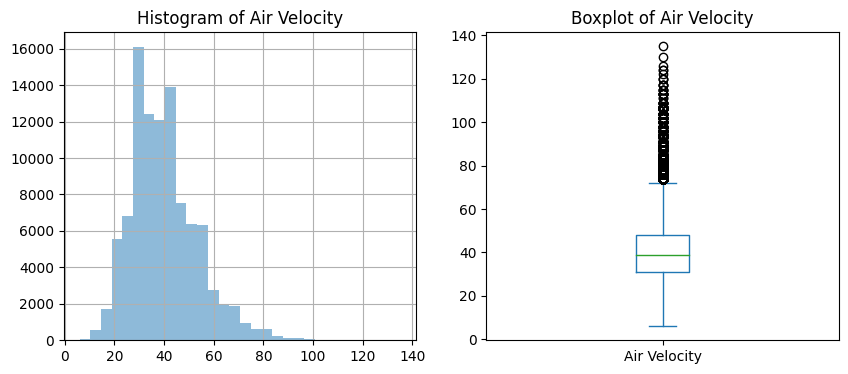

Statistics for Air Velocity:
Mean: 39.926808295397066
Median: 39.0
Mode: 35.0




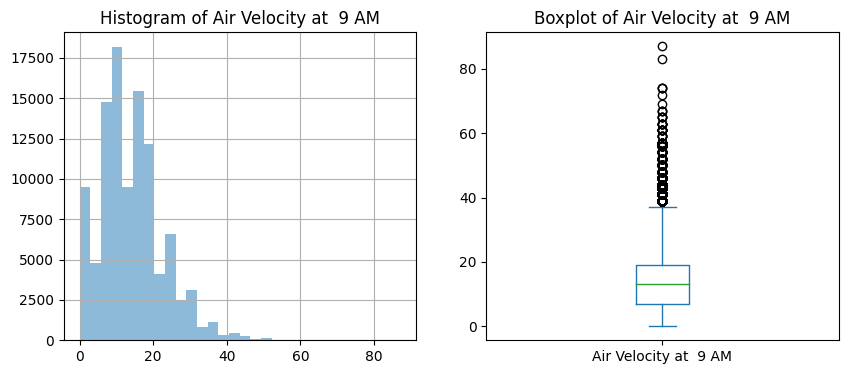

Statistics for Air Velocity at  9 AM:
Mean: 14.005908959676644
Median: 13.0
Mode: 9.0




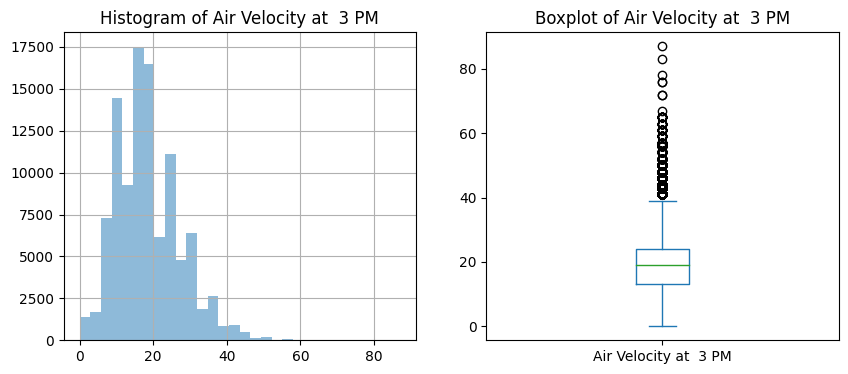

Statistics for Air Velocity at  3 PM:
Mean: 18.692955058129446
Median: 19.0
Mode: 13.0




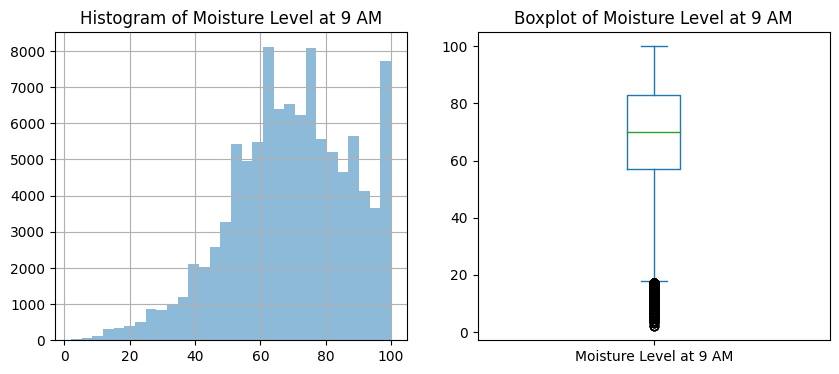

Statistics for Moisture Level at 9 AM:
Mean: 69.43328240140804
Median: 70.0
Mode: 99.0




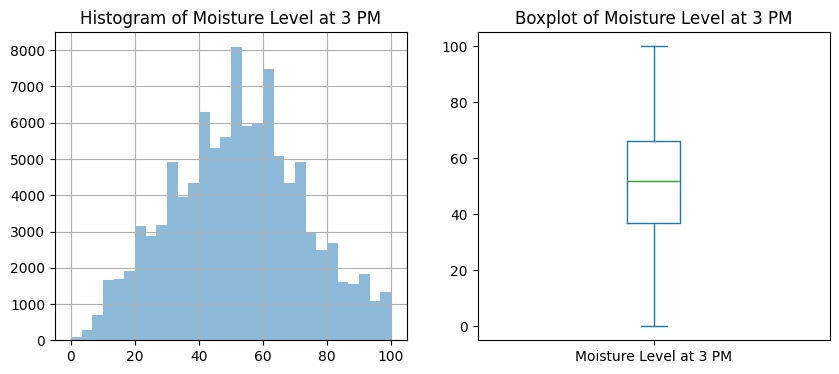

Statistics for Moisture Level at 3 PM:
Mean: 52.06644141963715
Median: 52.0
Mode: 52.0




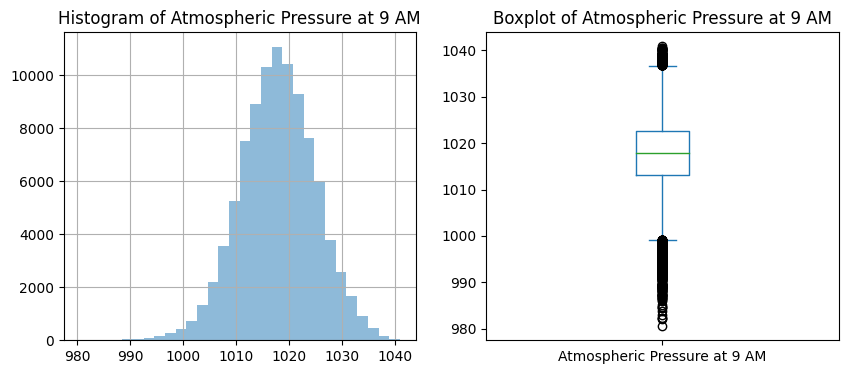

Statistics for Atmospheric Pressure at 9 AM:
Mean: 1017.8809821127236
Median: 1017.9
Mode: 1017.9




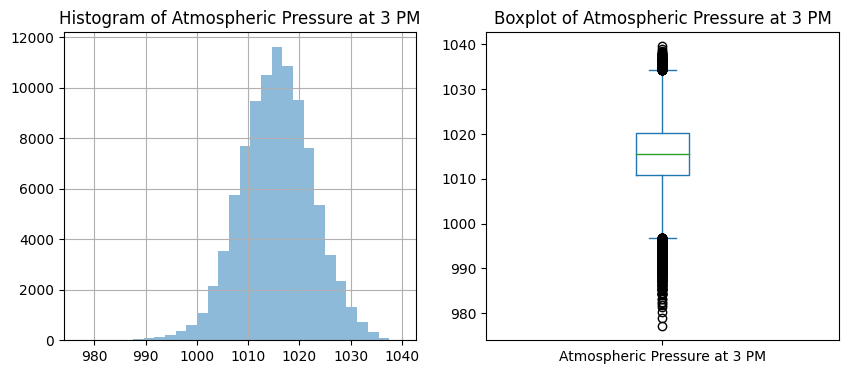

Statistics for Atmospheric Pressure at 3 PM:
Mean: 1015.5689213705851
Median: 1015.6
Mode: 1015.5




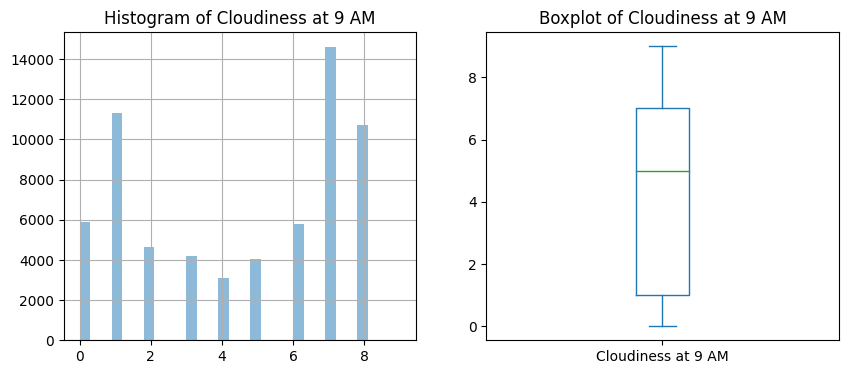

Statistics for Cloudiness at 9 AM:
Mean: 4.487927362054759
Median: 5.0
Mode: 7.0




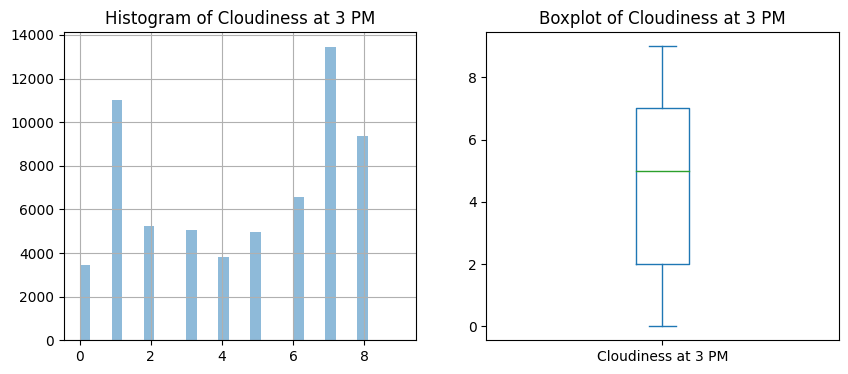

Statistics for Cloudiness at 3 PM:
Mean: 4.5316620595431
Median: 5.0
Mode: 7.0




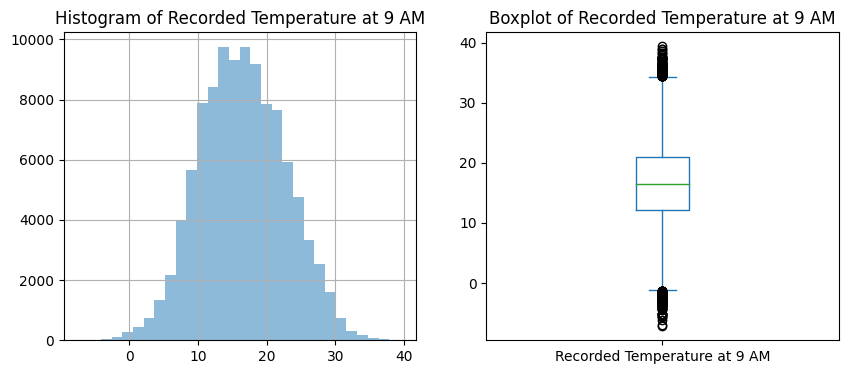

Statistics for Recorded Temperature at 9 AM:
Mean: 16.55520708182351
Median: 16.4
Mode: 17.0




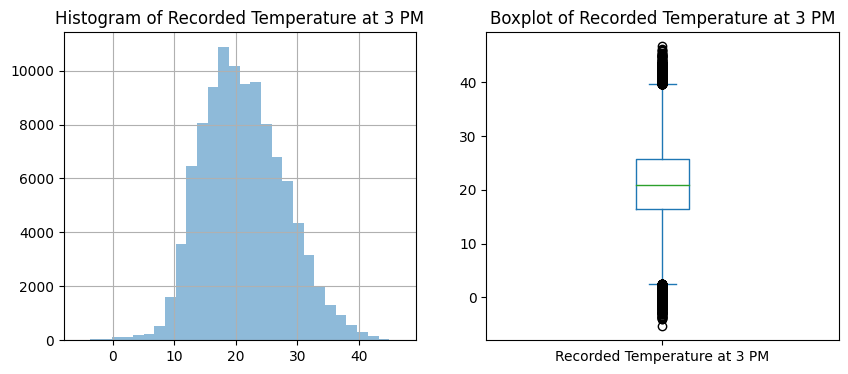

Statistics for Recorded Temperature at 3 PM:
Mean: 21.26357782028239
Median: 20.8
Mode: 18.4




In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
# Train = pd.read_csv('path_to_your_data.csv')

# Example features to visualize and potentially fill
features = train.select_dtypes(include=['float64', 'int64']).columns

for feature in features:
    plt.figure(figsize=(10, 4))

    # Create a histogram
    plt.subplot(1, 2, 1)
    train[feature].hist(bins=30, alpha=0.5)
    plt.title(f'Histogram of {feature}')

    # Create a boxplot
    plt.subplot(1, 2, 2)
    train[feature].plot(kind='box')
    plt.title(f'Boxplot of {feature}')

    plt.show()

    # Output current statistical data
    print(f"Statistics for {feature}:")
    print(f"Mean: {train[feature].mean()}")
    print(f"Median: {train[feature].median()}")
    print(f"Mode: {train[feature].mode()[0]}")  # mode() returns a Series, so we take the first value
    print("\n")


In [17]:
# Example of filling with the median
train['Evaporation'].fillna(train['Evaporation'].median(), inplace=True)
train['Air Velocity'].fillna(train['Air Velocity'].median(), inplace=True)
train[ 'Air Velocity at  9 AM'].fillna(train[ 'Air Velocity at  9 AM'].median(), inplace=True)
train['Air Velocity at  3 PM'].fillna(train['Air Velocity at  3 PM'].median(), inplace=True)
train['Moisture Level at 9 AM'].fillna(train['Moisture Level at 9 AM'].median(), inplace=True)
train['Moisture Level at 3 PM'].fillna(train['Moisture Level at 3 PM'].median(), inplace=True)
train['Atmospheric Pressure at 9 AM'].fillna(train['Atmospheric Pressure at 9 AM'].median(), inplace=True)
train['Atmospheric Pressure at 3 PM'].fillna(train['Atmospheric Pressure at 3 PM'].median(), inplace=True)
train['Cloudiness at 9 AM'].fillna(train['Cloudiness at 9 AM'].median(), inplace=True)
train['Cloudiness at 3 PM'].fillna(train['Cloudiness at 3 PM'].median(), inplace=True)



# Example of filling with the mean
train['Sunshine'].fillna(train['Sunshine'].mean(), inplace=True)

# Example of filling with the mode
train['Rainfall'].fillna(train['Rainfall'].mode()[0], inplace=True)
train['Gust Trajectory'].fillna(train['Gust Trajectory'].mode()[0], inplace=True)
train['Gust Trajectory at  9 AM'].fillna(train['Gust Trajectory at  9 AM'].mode()[0], inplace=True)
train['Gust Trajectory at  3 PM'].fillna(train['Gust Trajectory at  3 PM'].mode()[0], inplace=True)

In [18]:
# numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
# print(numerical_columns)
# train[numerical_columns] = train[numerical_columns].fillna(train[numerical_columns].median())

In [19]:
# categorical_columns = train.select_dtypes(include=['object']).columns
# print(categorical_columns)
# train[categorical_columns] = train[categorical_columns].fillna(train[categorical_columns].mode().iloc[0])

In [20]:
train.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Month                           0
Rain the day after              0
dtype: int64

In [21]:
unique_values = train['Gust Trajectory'].unique()

print(unique_values)

['SSE' 'WSW' 'N' 'E' 'SE' 'NNW' 'W' 'NNE' 'SSW' 'WNW' 'S' 'NW' 'SW' 'ESE'
 'ENE' 'NE']


In [22]:
unique_values = train['Rain that day'].unique()

print(unique_values)

['No' 'Yes']


In [23]:
# label_encoder = LabelEncoder()
# train['Gust Trajectory'] = label_encoder.fit_transform(train['Gust Trajectory'])
# train['Gust Trajectory at  9 AM'] = label_encoder.fit_transform(train['Gust Trajectory at  9 AM'])
# train['Gust Trajectory at  3 PM'] = label_encoder.fit_transform(train['Gust Trajectory at  3 PM'])
# train['Rain that day'] = label_encoder.fit_transform(train['Rain that day'])
# train['Rain the day after'] = label_encoder.fit_transform(train['Rain the day after'])
# train['Weather Station'] = train['Weather Station'].str.extract(r'(\d+)').astype(int)

import pandas as pd

# Example dataset

data_1 = {'SSE' : 1, 'WSW' : 2, 'N' : 3, 'E' : 4, 'SE' : 5, 'NNW' : 6, 'W' : 7, 'NNE' : 8, 'SSW' : 9, 'WNW' : 10, 'S' : 11, 'NW' : 12, 'SW' : 13, 'ESE' : 14, 'ENE' : 15 ,'NE' : 16}
data_2 = {'Yes' : 1, 'No' : 0}

# Encoding the 'Wind Direction' feature
train['Gust Trajectory'] = train['Gust Trajectory'].map(lambda x: data_1.get(x, -1000))
train['Gust Trajectory at  9 AM'] = train['Gust Trajectory at  9 AM'].map(lambda x: data_1.get(x, -1000))
train['Gust Trajectory at  3 PM'] = train['Gust Trajectory at  3 PM'].map(lambda x: data_1.get(x, -1000))

# Encoding the 'Rain Status' feature
train['Rain that day'] = train['Rain that day'].map(lambda x: data_2.get(x, -1000))
train['Rain the day after'] = train['Rain the day after'].map(lambda x: data_2.get(x, -1000))
train['Weather Station'] = train['Weather Station'].str.extract(r'(\d+)').astype(int)

# print(train)

In [24]:
train

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Month,Rain the day after
124608,36,17.6,33.8,0.0,4.4,7.555415,1,35.0,3,4,...,32.0,1017.9,1015.6,5.0,5.0,23.8,32.5,0,2,0
66486,19,5.4,12.0,26.2,2.8,0.300000,2,56.0,2,2,...,70.0,1013.3,1010.1,7.0,8.0,7.6,11.9,1,7,1
120003,32,9.2,24.5,0.0,5.2,10.800000,2,31.0,8,2,...,50.0,1024.7,1023.1,1.0,1.0,18.8,23.4,0,9,0
92858,14,20.1,26.9,7.2,4.4,7.555415,3,31.0,1,15,...,78.0,1021.9,1018.5,5.0,5.0,22.8,25.7,1,4,0
72545,20,19.6,38.2,0.0,12.0,11.500000,4,28.0,16,14,...,17.0,1014.3,1011.8,1.0,4.0,25.7,35.9,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,46,9.0,18.9,12.6,4.4,7.555415,7,43.0,10,7,...,52.0,1017.5,1017.7,5.0,5.0,15.8,17.6,1,9,1
122810,31,13.1,19.9,3.0,1.2,2.300000,13,39.0,13,7,...,55.0,1018.1,1018.2,7.0,7.0,15.4,19.1,1,9,0
106280,48,10.8,25.5,0.0,12.0,13.000000,9,44.0,9,1,...,21.0,1015.7,1012.6,0.0,0.0,15.3,23.1,0,12,0
135107,17,11.3,21.4,0.0,4.4,7.555415,14,39.0,1,5,...,79.0,1017.9,1015.6,8.0,4.0,15.8,15.7,0,11,1


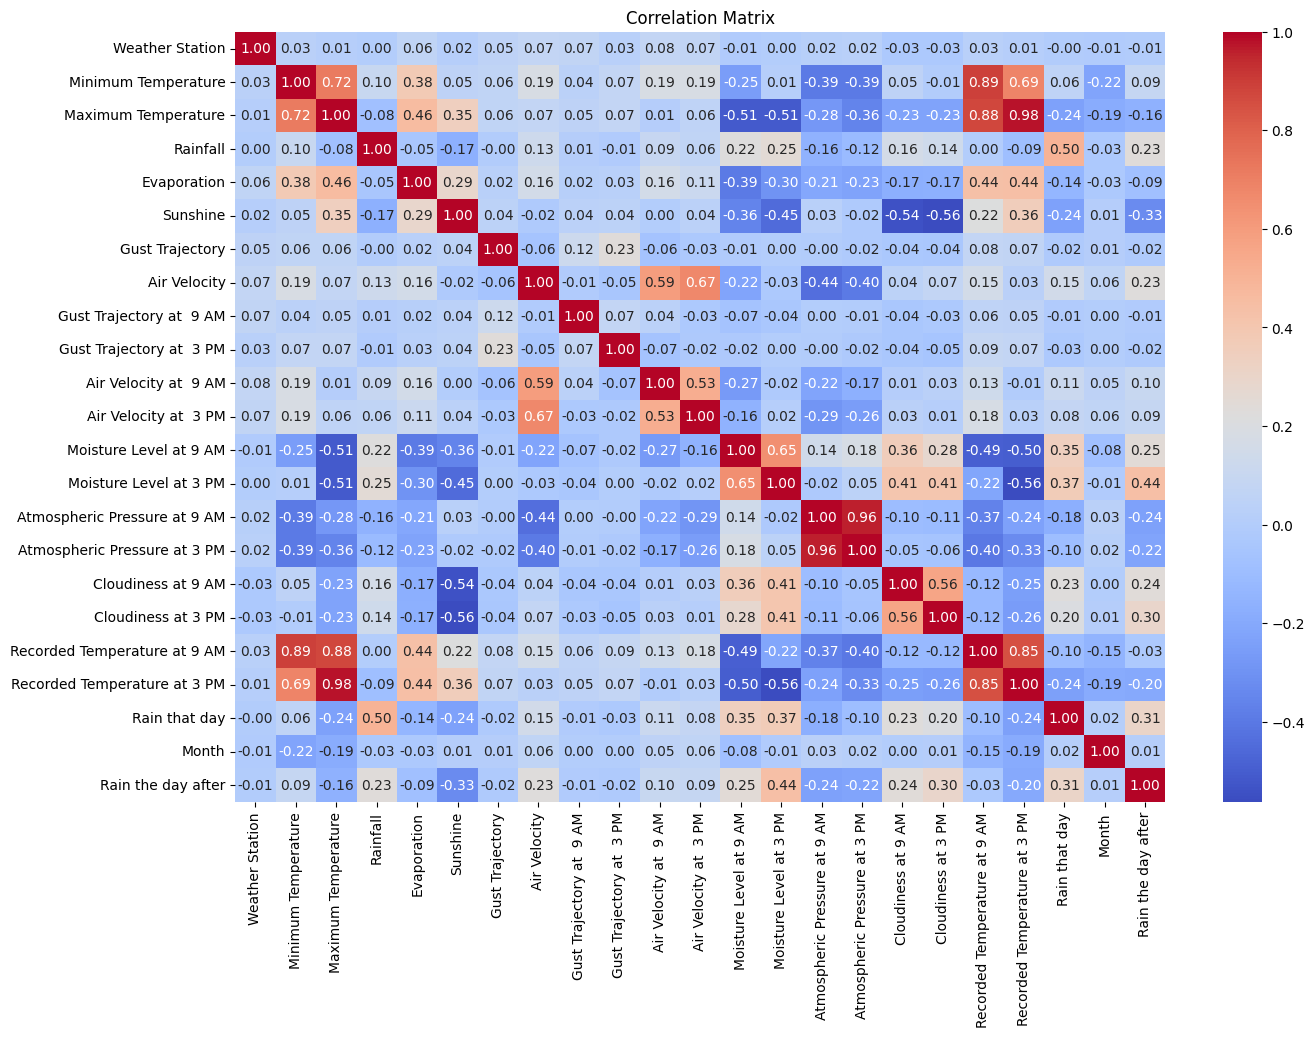

In [25]:
correlation_matrix = train.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
train = train.drop(['Atmospheric Pressure at 9 AM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'], axis=1)
train

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month,Rain the day after
124608,36,17.6,33.8,0.0,4.4,7.555415,1,35.0,3,4,20.0,13.0,65.0,32.0,1015.6,5.0,5.0,0,2,0
66486,19,5.4,12.0,26.2,2.8,0.300000,2,56.0,2,2,35.0,26.0,83.0,70.0,1010.1,7.0,8.0,1,7,1
120003,32,9.2,24.5,0.0,5.2,10.800000,2,31.0,8,2,13.0,19.0,69.0,50.0,1023.1,1.0,1.0,0,9,0
92858,14,20.1,26.9,7.2,4.4,7.555415,3,31.0,1,15,13.0,9.0,100.0,78.0,1018.5,5.0,5.0,1,4,0
72545,20,19.6,38.2,0.0,12.0,11.500000,4,28.0,16,14,9.0,11.0,47.0,17.0,1011.8,1.0,4.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,46,9.0,18.9,12.6,4.4,7.555415,7,43.0,10,7,20.0,15.0,70.0,52.0,1017.7,5.0,5.0,1,9,1
122810,31,13.1,19.9,3.0,1.2,2.300000,13,39.0,13,7,2.0,13.0,90.0,55.0,1018.2,7.0,7.0,1,9,0
106280,48,10.8,25.5,0.0,12.0,13.000000,9,44.0,9,1,26.0,15.0,41.0,21.0,1012.6,0.0,0.0,0,12,0
135107,17,11.3,21.4,0.0,4.4,7.555415,14,39.0,1,5,19.0,22.0,75.0,79.0,1015.6,8.0,4.0,0,11,1


In [27]:
test = pd.concat([X_test, y_test], axis=1)
test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Month,Rain the day after
100855,Station 22,4.2,18.5,0.2,3.4,2.8,NW,28.0,NNE,NW,...,54.0,1020.8,1017.5,8.0,7.0,10.0,17.0,No,9,No
111046,Station 1,13.0,18.9,0.0,4.4,9.7,NaN,NaN,S,NaN,...,NaN,1020.8,1019.3,6.0,NaN,16.8,NaN,No,12,No
6076,Station 10,26.2,38.5,0.0,14.6,13.3,E,39.0,NNE,ENE,...,17.0,1014.4,1011.5,0.0,2.0,29.6,37.0,No,1,No
37611,Station 42,17.8,34.0,0.0,9.0,8.9,S,37.0,ENE,SSE,...,27.0,1016.3,1013.3,5.0,5.0,22.9,32.5,No,1,No
32323,Station 37,15.1,28.0,5.0,6.2,11.2,NNE,35.0,W,ENE,...,25.0,1016.9,1015.0,1.0,1.0,19.4,27.5,Yes,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,Station 10,16.8,29.9,0.0,8.4,NaN,NNW,57.0,NE,NNE,...,11.0,1017.4,1011.2,4.0,3.0,20.4,29.4,No,8,No
46430,Station 9,14.2,30.9,0.0,7.2,NaN,NaN,NaN,NaN,NaN,...,37.0,NaN,NaN,NaN,NaN,21.3,30.5,No,2,No
131755,Station 15,14.5,28.7,0.0,0.4,11.4,NW,83.0,N,N,...,38.0,1005.0,996.0,NaN,NaN,19.2,26.9,No,12,No
133531,Station 17,6.9,22.5,0.0,NaN,NaN,N,20.0,ESE,NE,...,42.0,1020.8,1021.5,NaN,NaN,12.7,22.0,No,4,No


In [28]:
# Apply forward fill to specific columns
test['Maximum Temperature'].fillna(method='ffill', inplace=True)
test['Minimum Temperature'].fillna(method='ffill', inplace=True)
test['Recorded Temperature at 9 AM'].fillna(method='ffill', inplace=True)
test['Recorded Temperature at 3 PM'].fillna(method='ffill', inplace=True)

In [29]:
# Example of filling with the median
test['Evaporation'].fillna(train['Evaporation'].median(), inplace=True)
test['Air Velocity'].fillna(train['Air Velocity'].median(), inplace=True)
test[ 'Air Velocity at  9 AM'].fillna(train[ 'Air Velocity at  9 AM'].median(), inplace=True)
test['Air Velocity at  3 PM'].fillna(train['Air Velocity at  3 PM'].median(), inplace=True)
test['Moisture Level at 9 AM'].fillna(train['Moisture Level at 9 AM'].median(), inplace=True)
test['Moisture Level at 3 PM'].fillna(train['Moisture Level at 3 PM'].median(), inplace=True)
test['Atmospheric Pressure at 3 PM'].fillna(train['Atmospheric Pressure at 3 PM'].median(), inplace=True)
test['Cloudiness at 9 AM'].fillna(train['Cloudiness at 9 AM'].median(), inplace=True)
test['Cloudiness at 3 PM'].fillna(train['Cloudiness at 3 PM'].median(), inplace=True)



# Example of filling with the mean
test['Sunshine'].fillna(train['Sunshine'].mean(), inplace=True)

# Example of filling with the mode
test['Rainfall'].fillna(train['Rainfall'].mode()[0], inplace=True)
test['Gust Trajectory'].fillna(train['Gust Trajectory'].mode()[0], inplace=True)
test['Gust Trajectory at  9 AM'].fillna(train['Gust Trajectory at  9 AM'].mode()[0], inplace=True)
test['Gust Trajectory at  3 PM'].fillna(train['Gust Trajectory at  3 PM'].mode()[0], inplace=True)

In [30]:
test.isnull().sum()

Weather Station                    0
Minimum Temperature                0
Maximum Temperature                0
Rainfall                           0
Evaporation                        0
Sunshine                           0
Gust Trajectory                    0
Air Velocity                       0
Gust Trajectory at  9 AM           0
Gust Trajectory at  3 PM           0
Air Velocity at  9 AM              0
Air Velocity at  3 PM              0
Moisture Level at 9 AM             0
Moisture Level at 3 PM             0
Atmospheric Pressure at 9 AM    2694
Atmospheric Pressure at 3 PM       0
Cloudiness at 9 AM                 0
Cloudiness at 3 PM                 0
Recorded Temperature at 9 AM       0
Recorded Temperature at 3 PM       0
Rain that day                    255
Month                              0
Rain the day after                 0
dtype: int64

In [31]:
test = test.drop(['Atmospheric Pressure at 9 AM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'], axis=1)
test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month,Rain the day after
100855,Station 22,4.2,18.5,0.2,3.4,2.800000,NW,28.0,NNE,NW,13.0,20.0,97.0,54.0,1017.5,8.0,7.0,No,9,No
111046,Station 1,13.0,18.9,0.0,4.4,9.700000,7,39.0,S,5,6.0,19.0,68.0,52.0,1019.3,6.0,5.0,No,12,No
6076,Station 10,26.2,38.5,0.0,14.6,13.300000,E,39.0,NNE,ENE,15.0,19.0,37.0,17.0,1011.5,0.0,2.0,No,1,No
37611,Station 42,17.8,34.0,0.0,9.0,8.900000,S,37.0,ENE,SSE,15.0,22.0,54.0,27.0,1013.3,5.0,5.0,No,1,No
32323,Station 37,15.1,28.0,5.0,6.2,11.200000,NNE,35.0,W,ENE,15.0,26.0,47.0,25.0,1015.0,1.0,1.0,Yes,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,Station 10,16.8,29.9,0.0,8.4,7.555415,NNW,57.0,NE,NNE,28.0,26.0,40.0,11.0,1011.2,4.0,3.0,No,8,No
46430,Station 9,14.2,30.9,0.0,7.2,7.555415,7,39.0,3,5,13.0,19.0,63.0,37.0,1015.6,5.0,5.0,No,2,No
131755,Station 15,14.5,28.7,0.0,0.4,11.400000,NW,83.0,N,N,22.0,39.0,62.0,38.0,996.0,5.0,5.0,No,12,No
133531,Station 17,6.9,22.5,0.0,4.4,7.555415,N,20.0,ESE,NE,2.0,4.0,81.0,42.0,1021.5,5.0,5.0,No,4,No


In [32]:
test.describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Month
count,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.00000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000
mean,11.759242,22.689551,2.312282,4.921013,7.567161,39.949318,13.914885,18.649946,69.59562,52.058045,1015.598152,4.673856,4.731231,6.389507
std,6.133081,6.857805,8.238216,3.219391,2.740979,13.324238,8.936786,8.857665,18.44668,20.249970,6.691966,2.280074,2.099501,3.421181
min,-6.700000,-3.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.00000,0.000000,978.200000,0.000000,0.000000,1.000000
25%,7.400000,17.700000,0.000000,4.000000,7.555415,31.000000,7.000000,13.000000,58.00000,38.000000,1011.500000,4.000000,4.000000,3.000000
50%,11.600000,22.100000,0.000000,4.400000,7.555415,39.000000,13.000000,19.000000,70.00000,52.000000,1015.600000,5.000000,5.000000,6.000000
75%,16.200000,27.300000,0.800000,5.000000,8.600000,46.000000,19.000000,24.000000,83.00000,66.000000,1019.700000,6.000000,6.000000,9.000000
max,31.900000,48.100000,278.400000,82.400000,14.300000,135.000000,87.000000,83.000000,100.00000,100.000000,1037.800000,9.000000,8.000000,12.000000


In [33]:
# label_encoder = LabelEncoder()
# test['Gust Trajectory'] = label_encoder.fit_transform(test['Gust Trajectory'])
# test['Gust Trajectory at  9 AM'] = label_encoder.fit_transform(test['Gust Trajectory at  9 AM'])
# test['Gust Trajectory at  3 PM'] = label_encoder.fit_transform(test['Gust Trajectory at  3 PM'])
# test['Rain that day'] = label_encoder.fit_transform(test['Rain that day'])
# test['Rain the day after'] = label_encoder.fit_transform(test['Rain the day after'])
# test['Weather Station'] = test['Weather Station'].str.extract(r'(\d+)').astype(int)

import pandas as pd

# Example dataset

data_1 = {'SSE' : 1, 'WSW' : 2, 'N' : 3, 'E' : 4, 'SE' : 5, 'NNW' : 6, 'W' : 7, 'NNE' : 8, 'SSW' : 9, 'WNW' : 10, 'S' : 11, 'NW' : 12, 'SW' : 13, 'ESE' : 14, 'ENE' : 15 ,'NE' : 16}
data_2 = {'Yes' : 1, 'No' : 0}

# Encoding the 'Wind Direction' feature
test['Gust Trajectory'] = test['Gust Trajectory'].map(lambda x: data_1.get(x, -1))
test['Gust Trajectory at  9 AM'] = test['Gust Trajectory at  9 AM'].map(lambda x: data_1.get(x, -1))
test['Gust Trajectory at  3 PM'] = test['Gust Trajectory at  3 PM'].map(lambda x: data_1.get(x, -1))

# Encoding the 'Rain Status' feature
test['Rain that day'] = test['Rain that day'].map(lambda x: data_2.get(x, -1))
test['Rain the day after'] = test['Rain the day after'].map(lambda x: data_2.get(x, -1))
test['Weather Station'] = test['Weather Station'].str.extract(r'(\d+)').astype(int)

# print(train)

In [34]:
test.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Rain that day                   0
Month                           0
Rain the day after              0
dtype: int64

In [35]:
test.describe()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month,Rain the day after
count,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.00000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000
mean,24.165471,11.759242,22.689551,2.312282,4.921013,7.567161,7.610865,39.949318,7.569591,8.047782,13.914885,18.649946,69.59562,52.058045,1015.598152,4.673856,4.731231,0.214926,6.389507,0.223627
std,14.294913,6.133081,6.857805,8.238216,3.219391,2.740979,5.018494,13.324238,5.055386,4.800898,8.936786,8.857665,18.44668,20.249970,6.691966,2.280074,2.099501,0.433248,3.421181,0.416683
min,0.000000,-6.700000,-3.800000,0.000000,0.000000,0.000000,-1.000000,7.000000,-1.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,978.200000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,11.000000,7.400000,17.700000,0.000000,4.000000,7.555415,3.000000,31.000000,3.000000,4.000000,7.000000,13.000000,58.00000,38.000000,1011.500000,4.000000,4.000000,0.000000,3.000000,0.000000
50%,25.000000,11.600000,22.100000,0.000000,4.400000,7.555415,8.000000,39.000000,7.000000,8.000000,13.000000,19.000000,70.00000,52.000000,1015.600000,5.000000,5.000000,0.000000,6.000000,0.000000
75%,36.000000,16.200000,27.300000,0.800000,5.000000,8.600000,12.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.00000,66.000000,1019.700000,6.000000,6.000000,0.000000,9.000000,0.000000
max,48.000000,31.900000,48.100000,278.400000,82.400000,14.300000,16.000000,135.000000,16.000000,16.000000,87.000000,83.000000,100.00000,100.000000,1037.800000,9.000000,8.000000,1.000000,12.000000,1.000000


In [36]:
test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month,Rain the day after
100855,22,4.2,18.5,0.2,3.4,2.800000,12,28.0,8,12,13.0,20.0,97.0,54.0,1017.5,8.0,7.0,0,9,0
111046,1,13.0,18.9,0.0,4.4,9.700000,-1,39.0,11,-1,6.0,19.0,68.0,52.0,1019.3,6.0,5.0,0,12,0
6076,10,26.2,38.5,0.0,14.6,13.300000,4,39.0,8,15,15.0,19.0,37.0,17.0,1011.5,0.0,2.0,0,1,0
37611,42,17.8,34.0,0.0,9.0,8.900000,11,37.0,15,1,15.0,22.0,54.0,27.0,1013.3,5.0,5.0,0,1,0
32323,37,15.1,28.0,5.0,6.2,11.200000,8,35.0,7,15,15.0,26.0,47.0,25.0,1015.0,1.0,1.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,10,16.8,29.9,0.0,8.4,7.555415,6,57.0,16,8,28.0,26.0,40.0,11.0,1011.2,4.0,3.0,0,8,0
46430,9,14.2,30.9,0.0,7.2,7.555415,-1,39.0,-1,-1,13.0,19.0,63.0,37.0,1015.6,5.0,5.0,0,2,0
131755,15,14.5,28.7,0.0,0.4,11.400000,12,83.0,3,3,22.0,39.0,62.0,38.0,996.0,5.0,5.0,0,12,0
133531,17,6.9,22.5,0.0,4.4,7.555415,3,20.0,14,16,2.0,4.0,81.0,42.0,1021.5,5.0,5.0,0,4,0


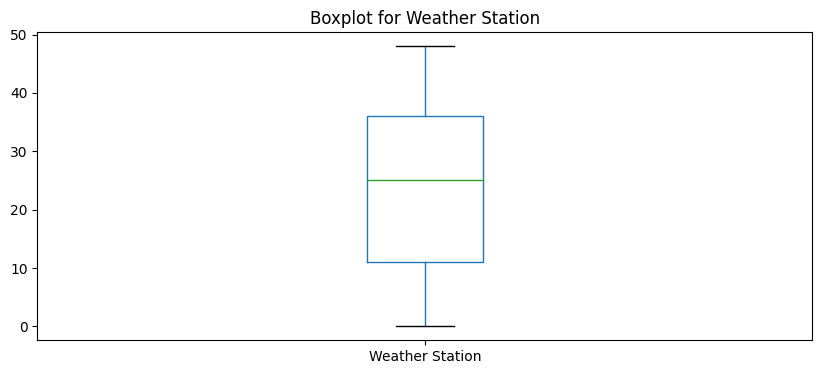

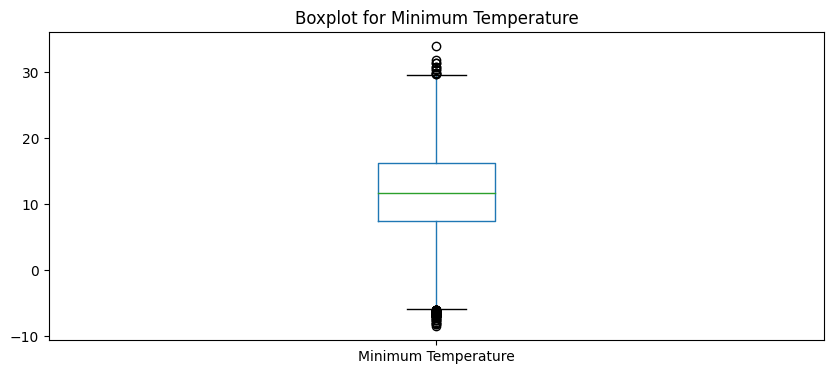

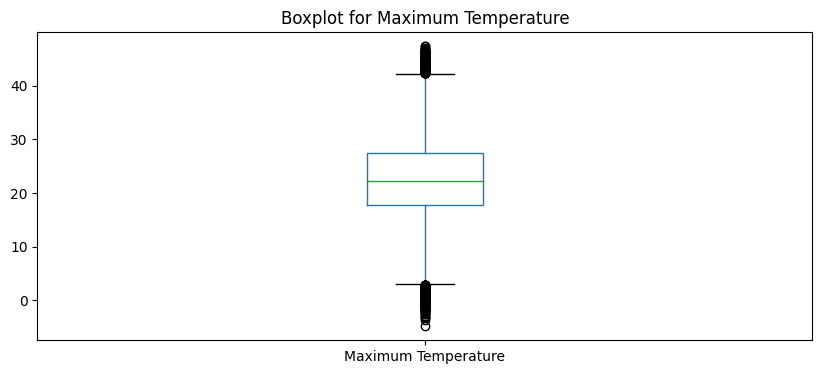

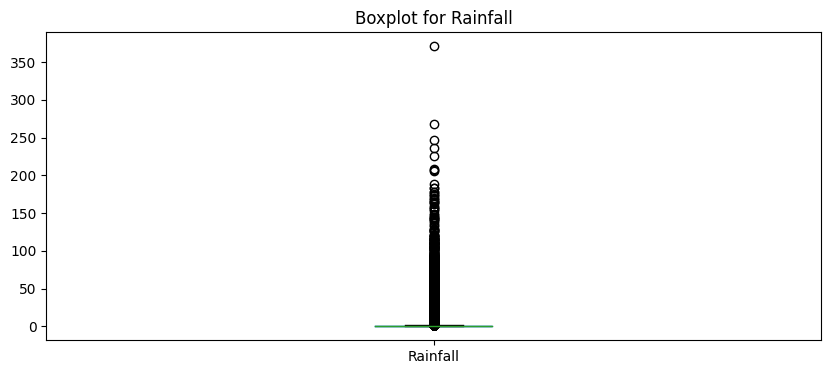

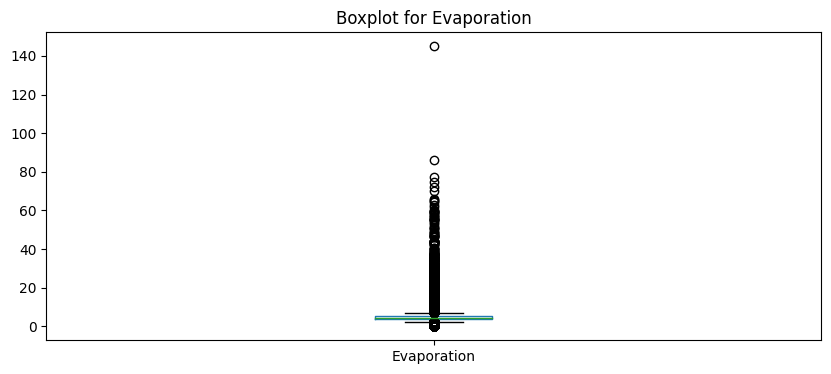

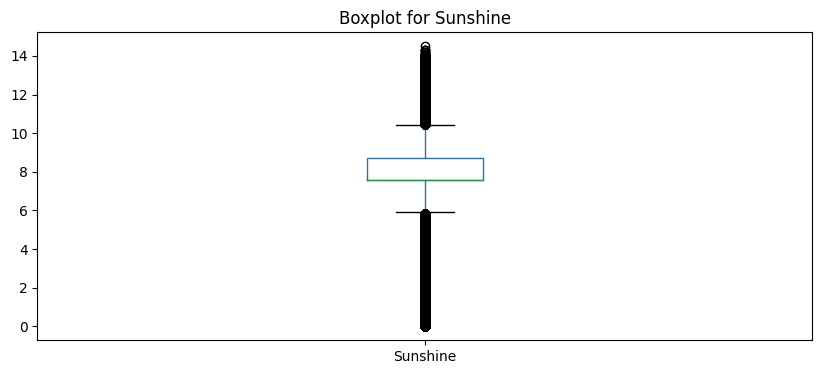

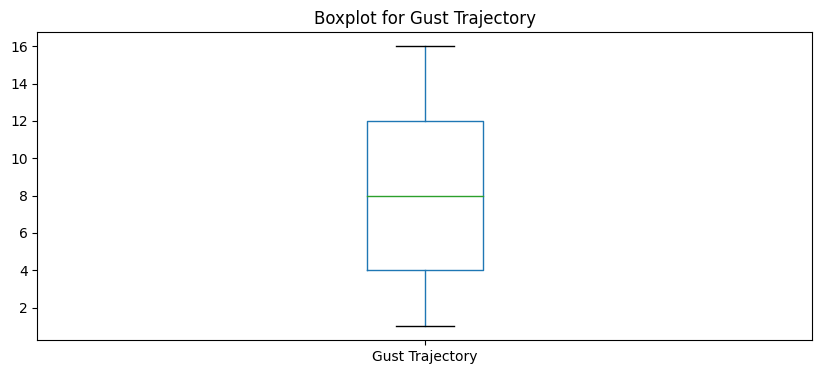

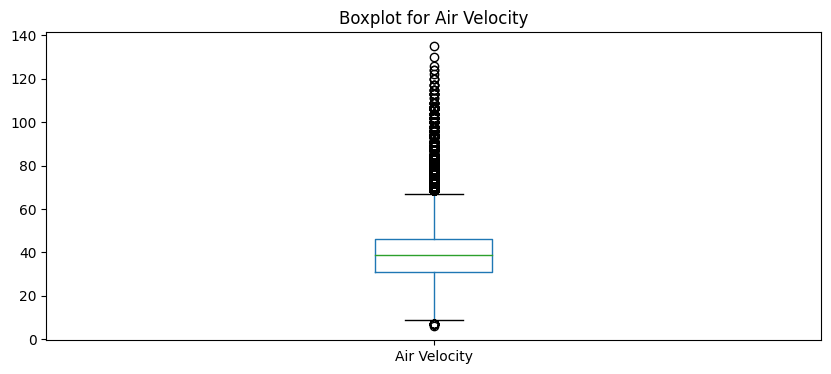

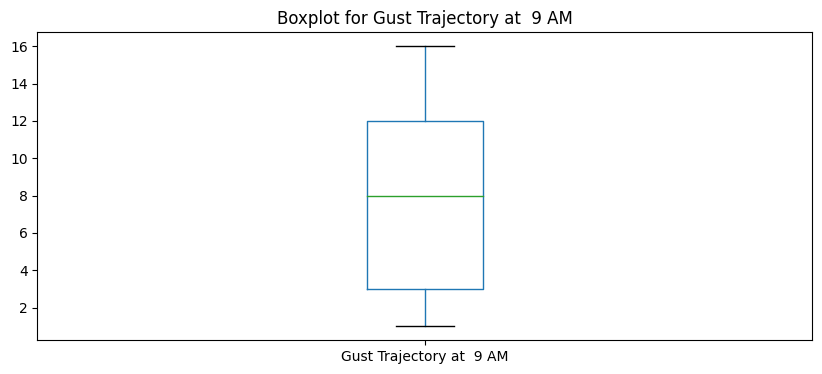

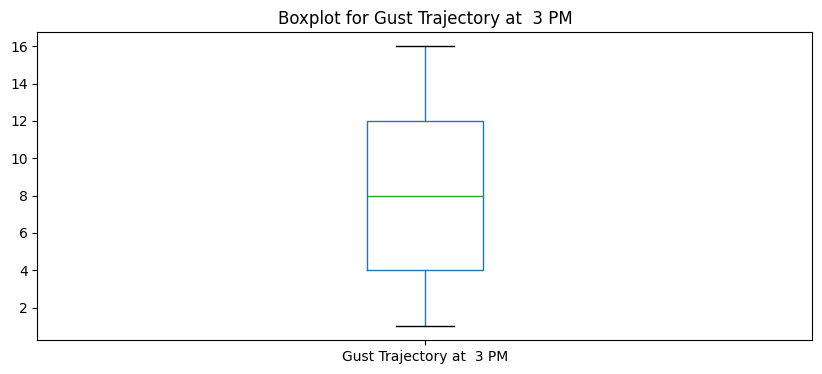

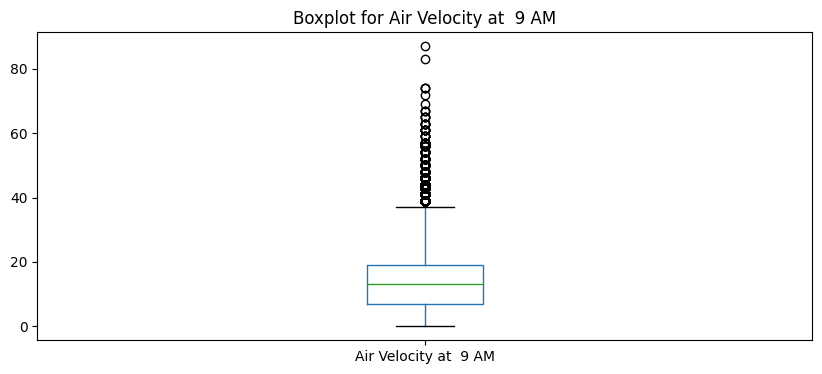

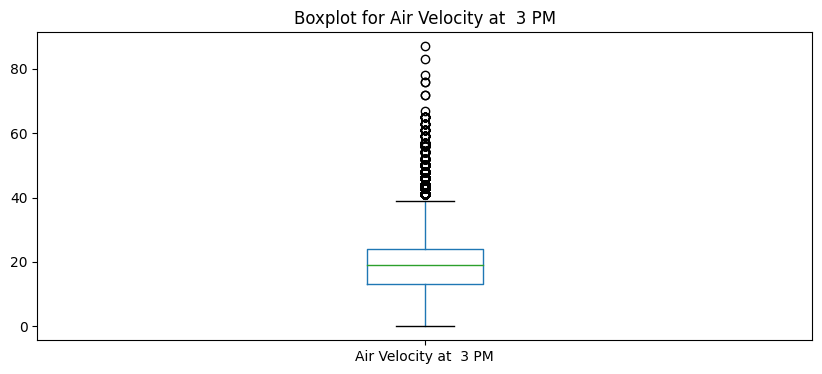

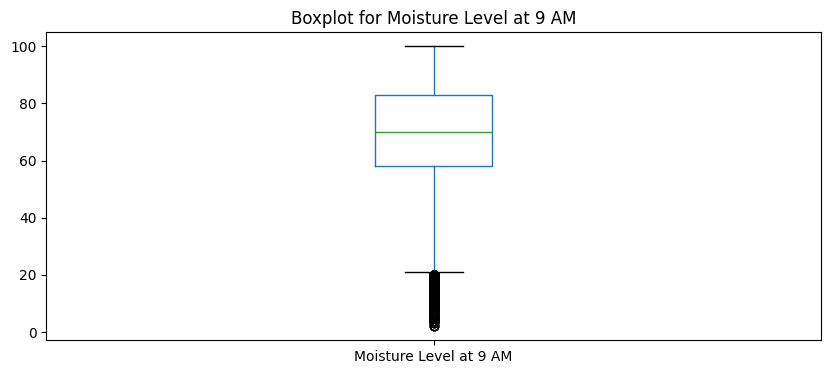

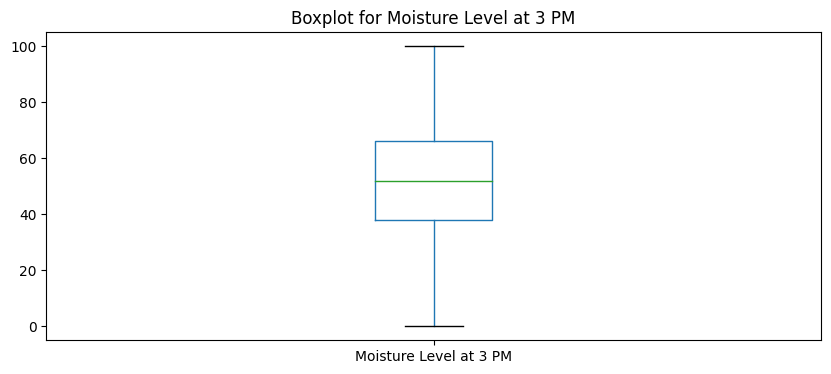

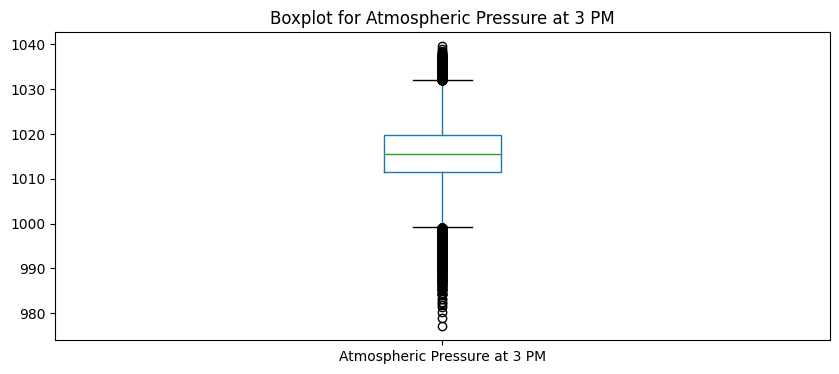

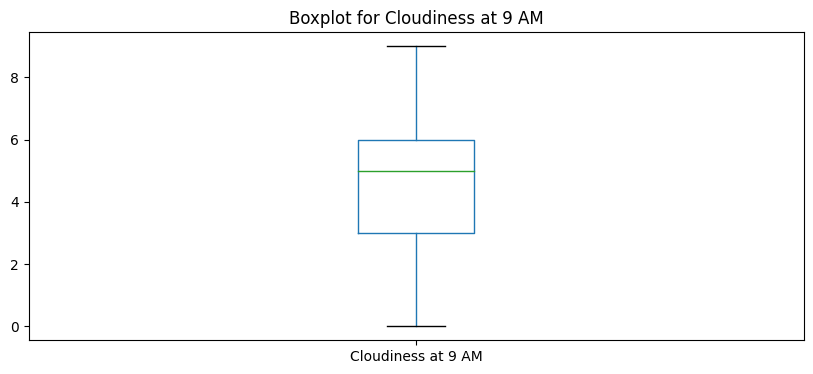

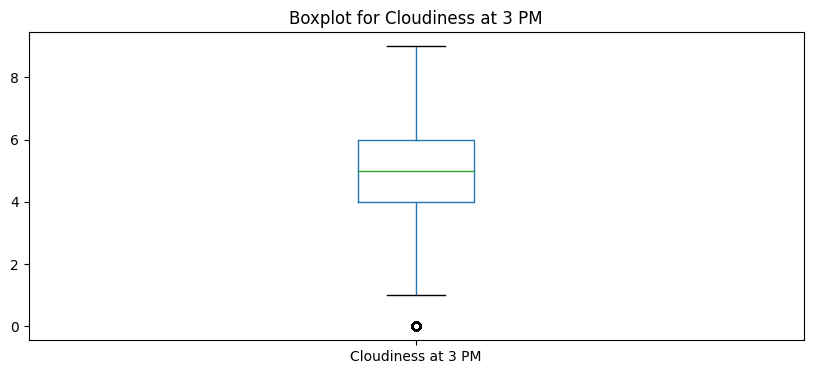

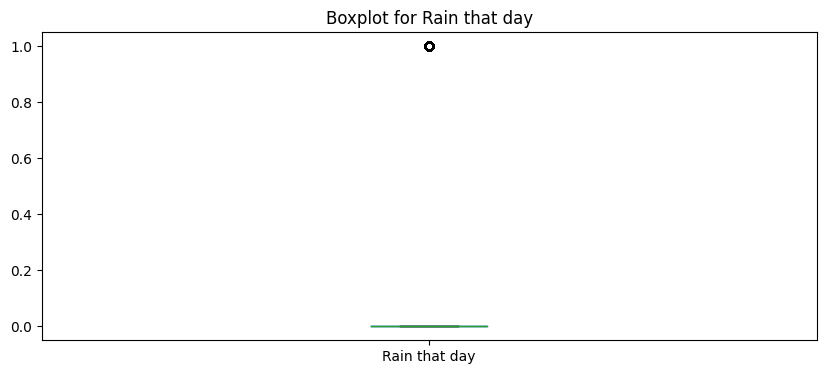

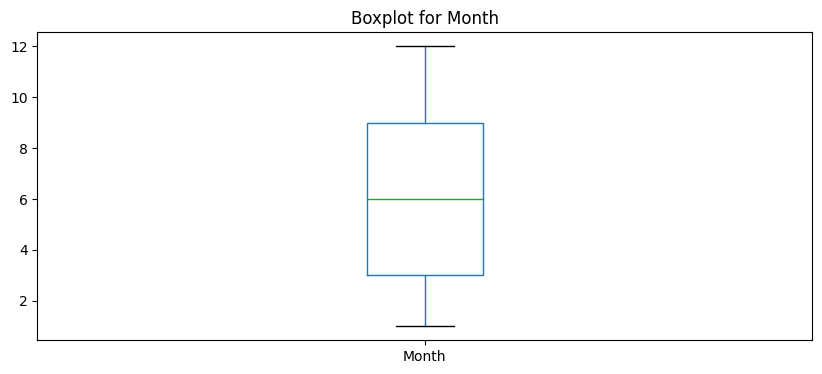

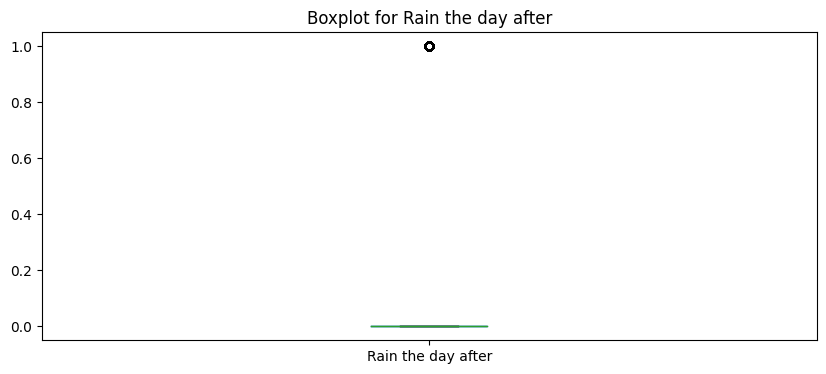

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a boxplot for each feature in the dataset
for column in train.columns:
    plt.figure(figsize=(10, 4))  # Set the figure size for better visibility
    train.boxplot(column)
    plt.title(f'Boxplot for {column}')  # Set title with the name of the feature
    plt.grid(False)  # Turn off the grid for cleaner plots
    plt.show()


In [38]:
feature = ['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Atmospheric Pressure at 3 PM']

In [39]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and predict whether each instance is an outlier (1 for inliers, -1 for outliers)
outliers = iso_forest.fit_predict(train)

# Add a column for outliers to the dataframe to analyze or to filter out later
train['outlier'] = outliers


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [40]:
# Filter out the outliers
train = train[train['outlier'] == 1]

In [41]:
train = train.drop('outlier', axis=1)
train

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month,Rain the day after
124608,36,17.6,33.8,0.0,4.4,7.555415,1,35.0,3,4,20.0,13.0,65.0,32.0,1015.6,5.0,5.0,0,2,0
120003,32,9.2,24.5,0.0,5.2,10.800000,2,31.0,8,2,13.0,19.0,69.0,50.0,1023.1,1.0,1.0,0,9,0
92858,14,20.1,26.9,7.2,4.4,7.555415,3,31.0,1,15,13.0,9.0,100.0,78.0,1018.5,5.0,5.0,1,4,0
72545,20,19.6,38.2,0.0,12.0,11.500000,4,28.0,16,14,9.0,11.0,47.0,17.0,1011.8,1.0,4.0,0,2,0
18141,26,19.6,26.1,0.0,4.4,7.555415,5,31.0,9,1,13.0,13.0,94.0,52.0,1019.6,5.0,5.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,46,9.0,18.9,12.6,4.4,7.555415,7,43.0,10,7,20.0,15.0,70.0,52.0,1017.7,5.0,5.0,1,9,1
122810,31,13.1,19.9,3.0,1.2,2.300000,13,39.0,13,7,2.0,13.0,90.0,55.0,1018.2,7.0,7.0,1,9,0
106280,48,10.8,25.5,0.0,12.0,13.000000,9,44.0,9,1,26.0,15.0,41.0,21.0,1012.6,0.0,0.0,0,12,0
135107,17,11.3,21.4,0.0,4.4,7.555415,14,39.0,1,5,19.0,22.0,75.0,79.0,1015.6,8.0,4.0,0,11,1


In [42]:
# for column in train.columns:
#     # Calculate the quartiles (Q1, Q3) and IQR for the current column
#     Q1 = train[column].quantile(0.25)
#     Q3 = train[column].quantile(0.75)
#     IQR = Q3 - Q1

#     # Detect outliers using the IQR method
#     outliers_iqr = ((train[column] < (Q1 - 1.5 * IQR)) | (train[column] > (Q3 + 1.5 * IQR)))


#     print(f"Column: {column}")
#     print(f"IQR: {IQR}")
#     print(f"Number of outliers: {outliers_iqr.sum()}")
#     print(f"Indices of outliers: {train.index[outliers_iqr].tolist()}\n")

In [43]:
# import pandas as pd
# import numpy as np

# # Sample DataFrame
# # train = pd.read_csv('path_to_your_dataset.csv')

# for column in feature:
#     if train[column].dtype != 'object':  # Ensure you're only processing numeric columns
#         Q1 = train[column].quantile(0.25)
#         Q3 = train[column].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Filtering out the outliers
#         train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]



# from scipy.stats.mstats import winsorize
# for column in train.columns:
#     if outliers_iqr.sum():
#         # if(train[column] >= 0).all() :
#         #     train[column] = np.log(train[column] + 1)

#         # else:
#       winsorized_column = winsorize(train[column])  # Adjust the limits as needed
#       train[column] = winsorized_column

In [44]:
# import pandas as pd
num_bins = 30  # Number of bins
train['Minimum Temperature'] = pd.cut(train['Minimum Temperature'], bins=num_bins, labels=False)
# bin_labels = list(range(num_bins))
train['Maximum Temperature'] = pd.cut(train['Maximum Temperature'], bins=num_bins, labels=False)

In [45]:
num_bins = 20  # Number of bins
columns = ['Rainfall', 'Evaporation', 'Sunshine', 'Air Velocity', 'Air Velocity at  3 PM',
           'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 3 PM']

for column in columns:
    bin_edges = pd.cut(train[column], bins=num_bins, labels=False)
    bin_labels = list(range(num_bins))  # Integer representations for each bin

    # Assign bin labels to the column
    train[column ] = bin_edges

In [46]:
X_train = train.drop('Rain the day after', axis=1)
y_train = train['Rain the day after']

In [47]:
y_train

124608    0
120003    0
92858     0
72545     0
18141     0
         ..
112920    1
122810    0
106280    0
135107    1
124925    0
Name: Rain the day after, Length: 98839, dtype: int64

In [48]:
pip install pandas scikit-learn imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
import numpy as np

# Check the new distribution
print(np.bincount(y_train))

[78896 78896]


In [51]:
print(y_train.value_counts())

Rain the day after
0    78896
1    78896
Name: count, dtype: int64


In [52]:
X_test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Month
100855,Station 22,4.2,18.5,0.2,3.4,2.8,NW,28.0,NNE,NW,...,97.0,54.0,1020.8,1017.5,8.0,7.0,10.0,17.0,No,9
111046,Station 1,13.0,18.9,0.0,4.4,9.7,NaN,NaN,S,NaN,...,68.0,NaN,1020.8,1019.3,6.0,NaN,16.8,NaN,No,12
6076,Station 10,26.2,38.5,0.0,14.6,13.3,E,39.0,NNE,ENE,...,37.0,17.0,1014.4,1011.5,0.0,2.0,29.6,37.0,No,1
37611,Station 42,17.8,34.0,0.0,9.0,8.9,S,37.0,ENE,SSE,...,54.0,27.0,1016.3,1013.3,5.0,5.0,22.9,32.5,No,1
32323,Station 37,15.1,28.0,5.0,6.2,11.2,NNE,35.0,W,ENE,...,47.0,25.0,1016.9,1015.0,1.0,1.0,19.4,27.5,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,Station 10,16.8,29.9,0.0,8.4,NaN,NNW,57.0,NE,NNE,...,40.0,11.0,1017.4,1011.2,4.0,3.0,20.4,29.4,No,8
46430,Station 9,14.2,30.9,0.0,7.2,NaN,NaN,NaN,NaN,NaN,...,63.0,37.0,NaN,NaN,NaN,NaN,21.3,30.5,No,2
131755,Station 15,14.5,28.7,0.0,0.4,11.4,NW,83.0,N,N,...,62.0,38.0,1005.0,996.0,NaN,NaN,19.2,26.9,No,12
133531,Station 17,6.9,22.5,0.0,NaN,NaN,N,20.0,ESE,NE,...,81.0,42.0,1020.8,1021.5,NaN,NaN,12.7,22.0,No,4


In [53]:
X_test = test.drop('Rain the day after', axis=1)
y_test = test['Rain the day after']

In [54]:
X_test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Month
100855,22,4.2,18.5,0.2,3.4,2.800000,12,28.0,8,12,13.0,20.0,97.0,54.0,1017.5,8.0,7.0,0,9
111046,1,13.0,18.9,0.0,4.4,9.700000,-1,39.0,11,-1,6.0,19.0,68.0,52.0,1019.3,6.0,5.0,0,12
6076,10,26.2,38.5,0.0,14.6,13.300000,4,39.0,8,15,15.0,19.0,37.0,17.0,1011.5,0.0,2.0,0,1
37611,42,17.8,34.0,0.0,9.0,8.900000,11,37.0,15,1,15.0,22.0,54.0,27.0,1013.3,5.0,5.0,0,1
32323,37,15.1,28.0,5.0,6.2,11.200000,8,35.0,7,15,15.0,26.0,47.0,25.0,1015.0,1.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,10,16.8,29.9,0.0,8.4,7.555415,6,57.0,16,8,28.0,26.0,40.0,11.0,1011.2,4.0,3.0,0,8
46430,9,14.2,30.9,0.0,7.2,7.555415,-1,39.0,-1,-1,13.0,19.0,63.0,37.0,1015.6,5.0,5.0,0,2
131755,15,14.5,28.7,0.0,0.4,11.400000,12,83.0,3,3,22.0,39.0,62.0,38.0,996.0,5.0,5.0,0,12
133531,17,6.9,22.5,0.0,4.4,7.555415,3,20.0,14,16,2.0,4.0,81.0,42.0,1021.5,5.0,5.0,0,4


In [55]:
X_test.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Rain that day                   0
Month                           0
dtype: int64

In [56]:
y_test.isnull().sum()

0

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Assuming X and y are your feature matrix and target vector
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)



# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# Evaluate the performance of the model
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.776373033874986
Accuracy: 0.78
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.87     20879
           1       0.00      0.00      0.00      6014

    accuracy                           0.78     26893
   macro avg       0.39      0.50      0.44     26893
weighted avg       0.60      0.78      0.68     26893



In [60]:
# Create a KNN classifier with k=3
knn1 = KNeighborsClassifier(n_neighbors=10)

# Train the classifier on the transformed training data
knn1.fit(X_train, y_train)

# Make predictions on the transformed test data
predictions1 = knn1.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

Accuracy: 0.776373033874986


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf_per=clf.predict(X_test)
# Evaluate the performance of the model
accuracy = accuracy_score(y_test,clf_per)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, clf_per))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.50      0.62     20879
           1       0.25      0.58      0.35      6014

    accuracy                           0.52     26893
   macro avg       0.53      0.54      0.49     26893
weighted avg       0.68      0.52      0.56     26893



In [62]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
clf = DecisionTreeClassifier(random_state=42 , max_depth=20)
clf.fit(X_train, y_train)
clf_per=clf.predict(X_test)
# Evaluate the performance of the model
accuracy = accuracy_score(y_test,clf_per)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, clf_per))


Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.52      0.63     20879
           1       0.26      0.59      0.36      6014

    accuracy                           0.53     26893
   macro avg       0.54      0.55      0.50     26893
weighted avg       0.69      0.53      0.57     26893



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     20879
           1       0.00      0.00      0.00      6014

    accuracy                           0.78     26893
   macro avg       0.39      0.50      0.44     26893
weighted avg       0.60      0.78      0.68     26893



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
